In [4]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import pandas as pd
!pip install seaborn
import seaborn as sns
sns.set_theme()
import re
import os

save_fig_dir = '/home/alw4013/keymorph/generated_figs'
if not os.path.exists(save_fig_dir):
    os.makedirs(save_fig_dir)
    
# Helper function for natural sorting (without natsort package)
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]
    
def load_data(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

In [2]:
def plot_boxplot(x_axis, specific_metric, data_dicts, save_name_suffix, title=None, ax=None):
    # Create a combined dataframe for all datasets
    combined_df = pd.DataFrame()
    
    # Process each label and its corresponding data dictionary
    for label, data_dict in data_dicts.items():
        records = []
        for key, values in data_dict.items():
            # Split the key into its components
            key_parts = key.split(':')
            metric, augmentation, alignment = key_parts[0], key_parts[-2], key_parts[-1]
            # Filter out records that don't match the specific metric
            if augmentation == 'rot180':
                continue
            if metric != specific_metric:
                continue
            for value in values:
                # Append the record to our list, with x_axis as a category and the values
                record = {
                    x_axis: locals()[x_axis],
                    'value': value,
                    'label': label
                }
                records.append(record)
        
        # Convert the list of records into a DataFrame and concatenate with the combined dataframe
        df = pd.DataFrame(records)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    # Apply natural sort to the x-axis categories
    combined_df[x_axis] = combined_df[x_axis].astype(str)  # Ensure all data is string type for sorting
    combined_df.sort_values(by=x_axis, key=lambda x: x.map(natural_sort_key), inplace=True)

    # Sort the labels naturally for hue_order
    sorted_labels = data_dicts.keys()
    
    # Plot the boxplot using seaborn
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    sns.boxplot(data=combined_df, x=x_axis, y='value', hue='label', hue_order=sorted_labels, showfliers=False, ax=ax, linewidth=3)
    if title:
        ax.set_title(title)
         
    if specific_metric == 'harddice':
        specific_metric_str = 'Dice' 
    elif specific_metric == 'hausd':
        specific_metric_str = 'HD'
    
    ax.set_ylabel(specific_metric_str, fontsize=24)
    ax.legend(fontsize=18, loc='lower left')
    ax.grid(True)
    ax.set_xlabel('')
    ax.tick_params(axis='both', labelsize=20)
    plt.savefig(os.path.join(save_fig_dir, f'boxplot_{specific_metric}_vs_{x_axis}_{save_name_suffix}.png'),
               format='png', dpi=100, bbox_inches='tight')
    plt.show()
    


# Pairwise unimodal

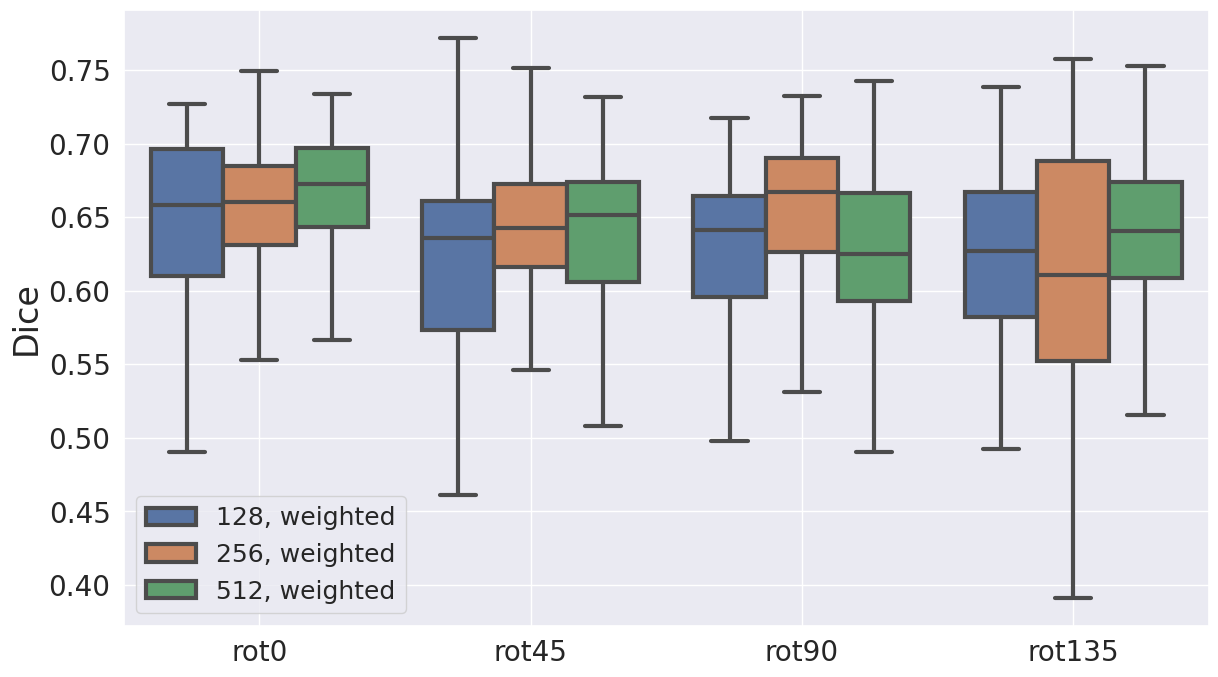

In [3]:
paths = {
# '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
# '256, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
# '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
'128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
'256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
'512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
# 'itkelastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
# 'itkelastix-numres4': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
# 'ants': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
# 'synthmorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__synthmorph_datasetgigamed_modelsynthmorph_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_unimodal.json',
}

# plot_boxplot('alignment', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              title_suffix=', pairwise unimodal, skullstripped')
plot_boxplot('augmentation', 'harddice', 
             {k: load_data(v) for k, v in paths.items()}, 
             save_name_suffix='keymorph_keypoint_comparison_pairwise_unimodal_skullstripped')

paths = {
# '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
# '256, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
# '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
'128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
'256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
'512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
# 'itkelastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
# 'itkelastix-numres4': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
# 'ants': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
#     'synthmorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__synthmorph_datasetgigamed_modelsynthmorph_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_unimodal.json',
}

# plot_boxplot('alignment', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              title_suffix=', pairwise unimodal, non-skullstripped')
# plot_boxplot('augmentation', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              save_name_suffix='_pairwise_unimodal_nonskullstripped')

# Pairwise multimodal

In [4]:
paths = {
# '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
# '256, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
# '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
'128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
'256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
'512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
# 'itkelastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
# 'itkelastix-numres4': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
# 'ants': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_multimodal.json',
# 'synthmorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__synthmorph_datasetgigamed_modelsynthmorph_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',

}

# plot_boxplot('alignment', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              title_suffix=', pairwise multimodal, skullstripped')
# plot_boxplot('augmentation', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              save_name_suffix='pairwise_multimodal_skullstripped')

paths = {
# '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
# '256, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
# '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
'128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
'256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
'512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
# 'itkelastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
# 'itkelastix-numres4': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
# 'ants': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',
# 'synthmorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__synthmorph_datasetgigamed_modelsynthmorph_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_multimodal.json',

}

# plot_boxplot('alignment', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              title_suffix=', pairwise multimodal, non-skullstripped')
# plot_boxplot('augmentation', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              save_name_suffix='pairwise_multimodal_nonskullstripped')

# Lesion

In [5]:
def plot_boxplot_lesion(x_axis, specific_metric, data_dicts, save_name_suffix, title=None, ax=None):
    '''Same as plot_boxplot above but only looks at affine and dense (for synthmorph).'''
    # Create a combined dataframe for all datasets
    combined_df = pd.DataFrame()
    
    # Process each label and its corresponding data dictionary
    for label, data_dict in data_dicts.items():
        records = []
        for key, values in data_dict.items():
            # Split the key into its components
            key_parts = key.split(':')
            metric, augmentation, alignment = key_parts[0], key_parts[-2], key_parts[-1]
            if alignment not in ['affine', 'dense']:
                continue
            # Filter out records that don't match the specific metric
            if augmentation == 'rot180':
                continue
            if metric != specific_metric:
                continue
            for value in values:
                # Append the record to our list, with x_axis as a category and the values
                record = {
                    x_axis: locals()[x_axis],
                    'value': value,
                    'label': label
                }
                records.append(record)
        
        # Convert the list of records into a DataFrame and concatenate with the combined dataframe
        df = pd.DataFrame(records)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    # Apply natural sort to the x-axis categories
    combined_df[x_axis] = combined_df[x_axis].astype(str)  # Ensure all data is string type for sorting
    combined_df.sort_values(by=x_axis, key=lambda x: x.map(natural_sort_key), inplace=True)

    # Sort the labels naturally for hue_order
#     sorted_labels = sorted(data_dicts.keys(), key=natural_sort_key)
    sorted_labels = data_dicts.keys()
    
    # Plot the boxplot using seaborn
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(14, 8))
        
    sns.boxplot(data=combined_df, x=x_axis, y='value', hue='label', hue_order=sorted_labels, ax=ax, showfliers=False, linewidth=3)
    if title:
        ax.set_title(title)
    
    if specific_metric == 'harddice':
        specific_metric_str = 'Dice' 
    elif specific_metric == 'hausd':
        specific_metric_str = 'HD'

    ax.set_ylabel(specific_metric_str, fontsize=20)
    ax.set_xlabel('')
    ax.legend(fontsize=16, loc='lower left')
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=20)
    plt.savefig(os.path.join(save_fig_dir, f'boxplot_{specific_metric}_vs_{x_axis}_{save_name_suffix}.png'),
               format='png', dpi=100, bbox_inches='tight')
    plt.show()
    return ax

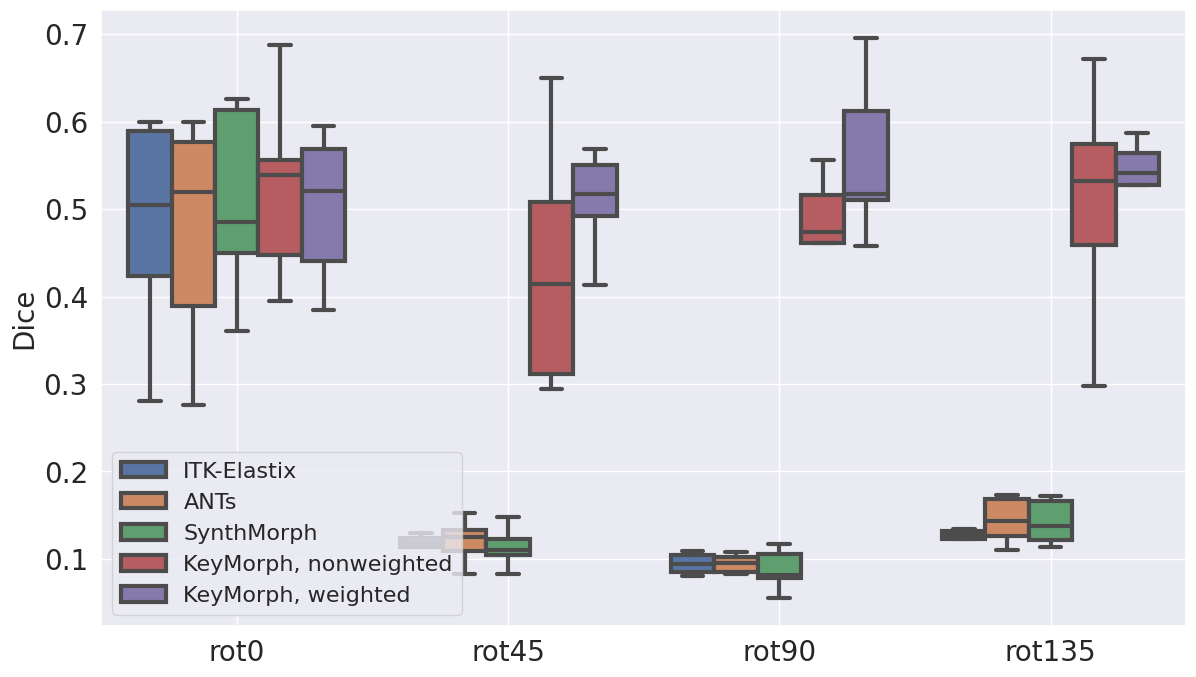

In [6]:
paths = {

# 'itkelastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
'ITK-Elastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
'ANTs': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
'SynthMorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__synthmorph_datasetgigamed_modelsynthmorph_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
# '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
'KeyMorph, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
# '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
# '128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
'KeyMorph, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
# '512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_lesion.json',
}

# plot_boxplot_lesion('alignment', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              save_name_suffix='pairwise_affine_lesion_skullstripped')
plot_boxplot_lesion('augmentation', 'harddice', 
             {k: load_data(v) for k, v in paths.items()}, 
             save_name_suffix='pairwise_affine_lesion_skullstripped')
# plot_boxplot('augmentation', 'hausd', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              save_name_suffix='pairwise_lesion_skullstripped')
# No non-skullstripped lesion
paths = {}

# Longitudinal

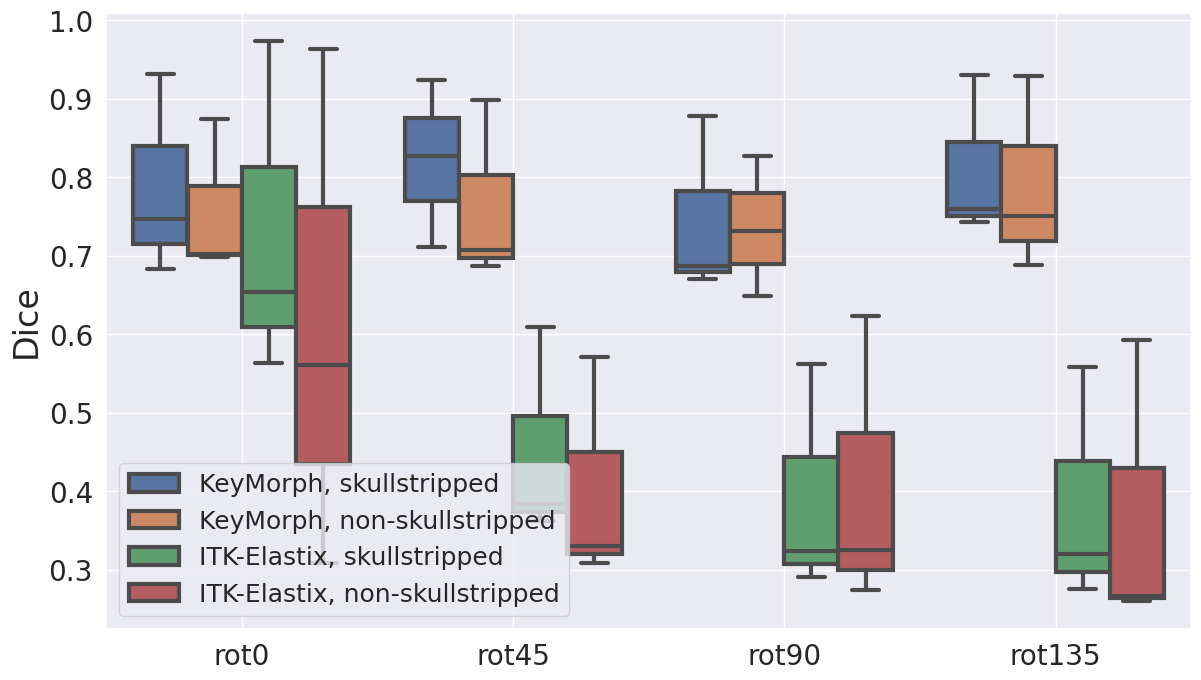

In [7]:
# paths = {
# # '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# # '256, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# # '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# # '128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# # '256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# # '512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# 'KeyMorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# 'ITK-Elastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# }

# # plot_boxplot('alignment', 'harddice', 
# #              {k: load_data(v) for k, v in paths.items()}, 
# #              title_suffix=', longitudinal, skullstripped')
# plot_boxplot('augmentation', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              save_name_suffix='longitudinal_skullstripped')

# paths = {
# # '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# # '256, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# # '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# # '128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# # '256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# # '512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# 'KeyMorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# 'ITK-Elastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
# }

# # plot_boxplot('alignment', 'harddice', 
# #              {k: load_data(v) for k, v in paths.items()}, 
# #              title_suffix=', longitudinal, non-skullstripped')
# plot_boxplot('augmentation', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              save_name_suffix='longitudinal_nonskullstripped')

paths = {
# '128, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# '256, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# '512, nonweighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# '128, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# '256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
# '512, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
'KeyMorph, skullstripped': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
'KeyMorph, non-skullstripped': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',
'ITK-Elastix, skullstripped': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_ss_long.json',
'ITK-Elastix, non-skullstripped': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/summary_nss_long.json',

}

# plot_boxplot('alignment', 'harddice', 
#              {k: load_data(v) for k, v in paths.items()}, 
#              title_suffix=', longitudinal, skullstripped')
plot_boxplot('augmentation', 'harddice', 
             {k: load_data(v) for k, v in paths.items()}, 
             save_name_suffix='longitudinal_ss_and_nss')

# Group

In [58]:
def plot_group_line(metric, list_of_data_dicts, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    sns.set(style="whitegrid")
    if metric == 'harddice':
        metric_name = 'Dice'
    else:
        metric_name = metric_name
    for line_name, data_dicts in list_of_data_dicts.items():
        xs = []
        vals = []
        for group_size, data_dict in data_dicts.items():
            xs.append(group_size)
            val = data_dict[metric]
            vals.append(val)

        ax.plot(xs, vals, '-o', label=line_name, linewidth=4)
    ax.legend(fontsize=20)
    ax.set_xlabel('Group size', fontsize=20)
    ax.set_ylabel(metric_name, fontsize=20)
    ax.tick_params(axis='both', labelsize=16)
    ax.set_xticks([4, 16, 32, 64, 128])
#     ax.set_xscale("log")

/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/registration_results.pt
/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/registration_results.pt
/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/reg

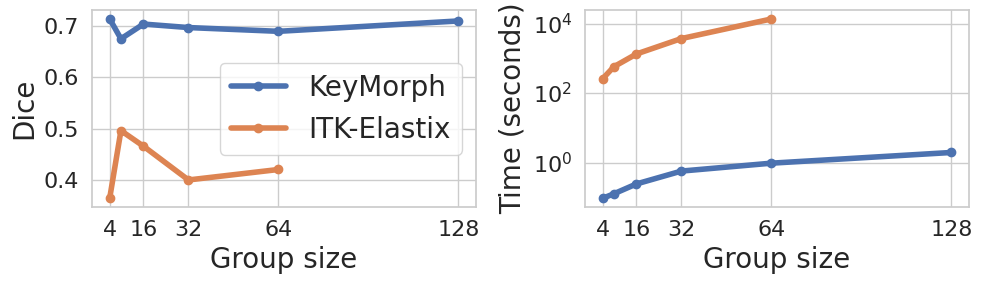

In [64]:
paths = {
# '128, nonweighted': {
#     4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-tps_0.json',
#     8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-tps_0.json',
#     16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-tps_0.json',
#     32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-tps_0.json',
#     64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-tps_0.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-tps_0.json',
#     },
# '256, nonweighted': {
#     4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-tps_0.json',
#     8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-tps_0.json',
#     16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-tps_0.json',
#     32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-tps_0.json',
#     64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-tps_0.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-tps_0.json',
#     },
# '512, nonweighted': {
#     4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-tps_0.json',
#     8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-tps_0.json',
#     16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-tps_0.json',
#     32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-tps_0.json',
#     64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-tps_0.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-tps_0.json',
#     },
# '128, weighted': {
#     4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-tps_0.json',
#     8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-tps_0.json',
#     16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-tps_0.json',
#     32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-tps_0.json',
#     64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-tps_0.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-tps_0.json',
#     },
# '256, weighted': {
#     4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-tps_0.json',
#     8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-tps_0.json',
#     16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-tps_0.json',
#     32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-tps_0.json',
#     64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-tps_0.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-tps_0.json',
#     },
# '512, weighted': {
#     4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-tps_0.json',
#     8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-tps_0.json',
#     16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-tps_0.json',
#     32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-tps_0.json',
#     64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-tps_0.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-512_datasetgigamed_modelkeymorph_keypoints512_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-tps_0.json',
#     },
# 'itkelastix': {
#     4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-bspline.json',
#     8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-bspline.json',
#     16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-bspline.json',
#     32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-bspline.json',
#     64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-bspline.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-bspline.json',
#     },
'KeyMorph': {
    4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-tps_0.json',
    8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-tps_0.json',
    16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-tps_0.json',
    32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-tps_0.json',
    64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-tps_0.json',
    128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-tps_0.json',
    },
'ITK-Elastix': {
    4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/metrics-bspline.json',
    8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/metrics-bspline.json',
    16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/metrics-bspline.json',
    32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/metrics-bspline.json',
    64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/metrics-bspline.json',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-bspline.json',
    },
}

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_group_line('harddice', 
             {name: {k: load_data(v) for k, v in dic.items()} for name, dic in paths.items()}, ax=axes[0]) 

paths = {
'KeyMorph': {
    4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/registration_results.pt',
    8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/registration_results.pt',
    16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/registration_results.pt',
    32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/registration_results.pt',
    64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/registration_results.pt',
    128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/registration_results.pt',
    },
'ITK-Elastix': {
    4: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/registration_results.pt',
    8: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_8/registration_results.pt',
    16: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_16/registration_results.pt',
    32: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_32/registration_results.pt',
    64: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_64/registration_results.pt',
#     128: '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_128/metrics-bspline.json',
    },
}

keymorph_times = []
for path in paths['KeyMorph'].values():
    print(path)
    results = torch.load(path)
    time = results['tps_0']['time']
    keymorph_times.append(time)
    
itk_times = []
for path in paths['ITK-Elastix'].values():
    results = torch.load(path)
    time = results['bspline']['time']
    itk_times.append(time)
    
axes[1].plot(paths['KeyMorph'].keys(), keymorph_times, '-o', label='KeyMorph', linewidth=4)
axes[1].plot(paths['ITK-Elastix'].keys(), itk_times, '-o', label='ITK-Elastix', linewidth=4)
axes[1].set_yscale('log')
# axes[1].legend(fontsize=20)
axes[1].set_ylabel('Time (seconds)', fontsize=20)
axes[1].set_xlabel('Group size', fontsize=20)
axes[1].tick_params(axis='both', labelsize=16)
axes[1].set_xticks([4, 16, 32, 64, 128])
plt.tight_layout()
plt.savefig(os.path.join(save_fig_dir, f'lineplot_dice_time_vs_groupsize.png'),
               format='png', dpi=100, bbox_inches='tight')
plt.show()

# Keypoint visualizations

(2, 256, 3)


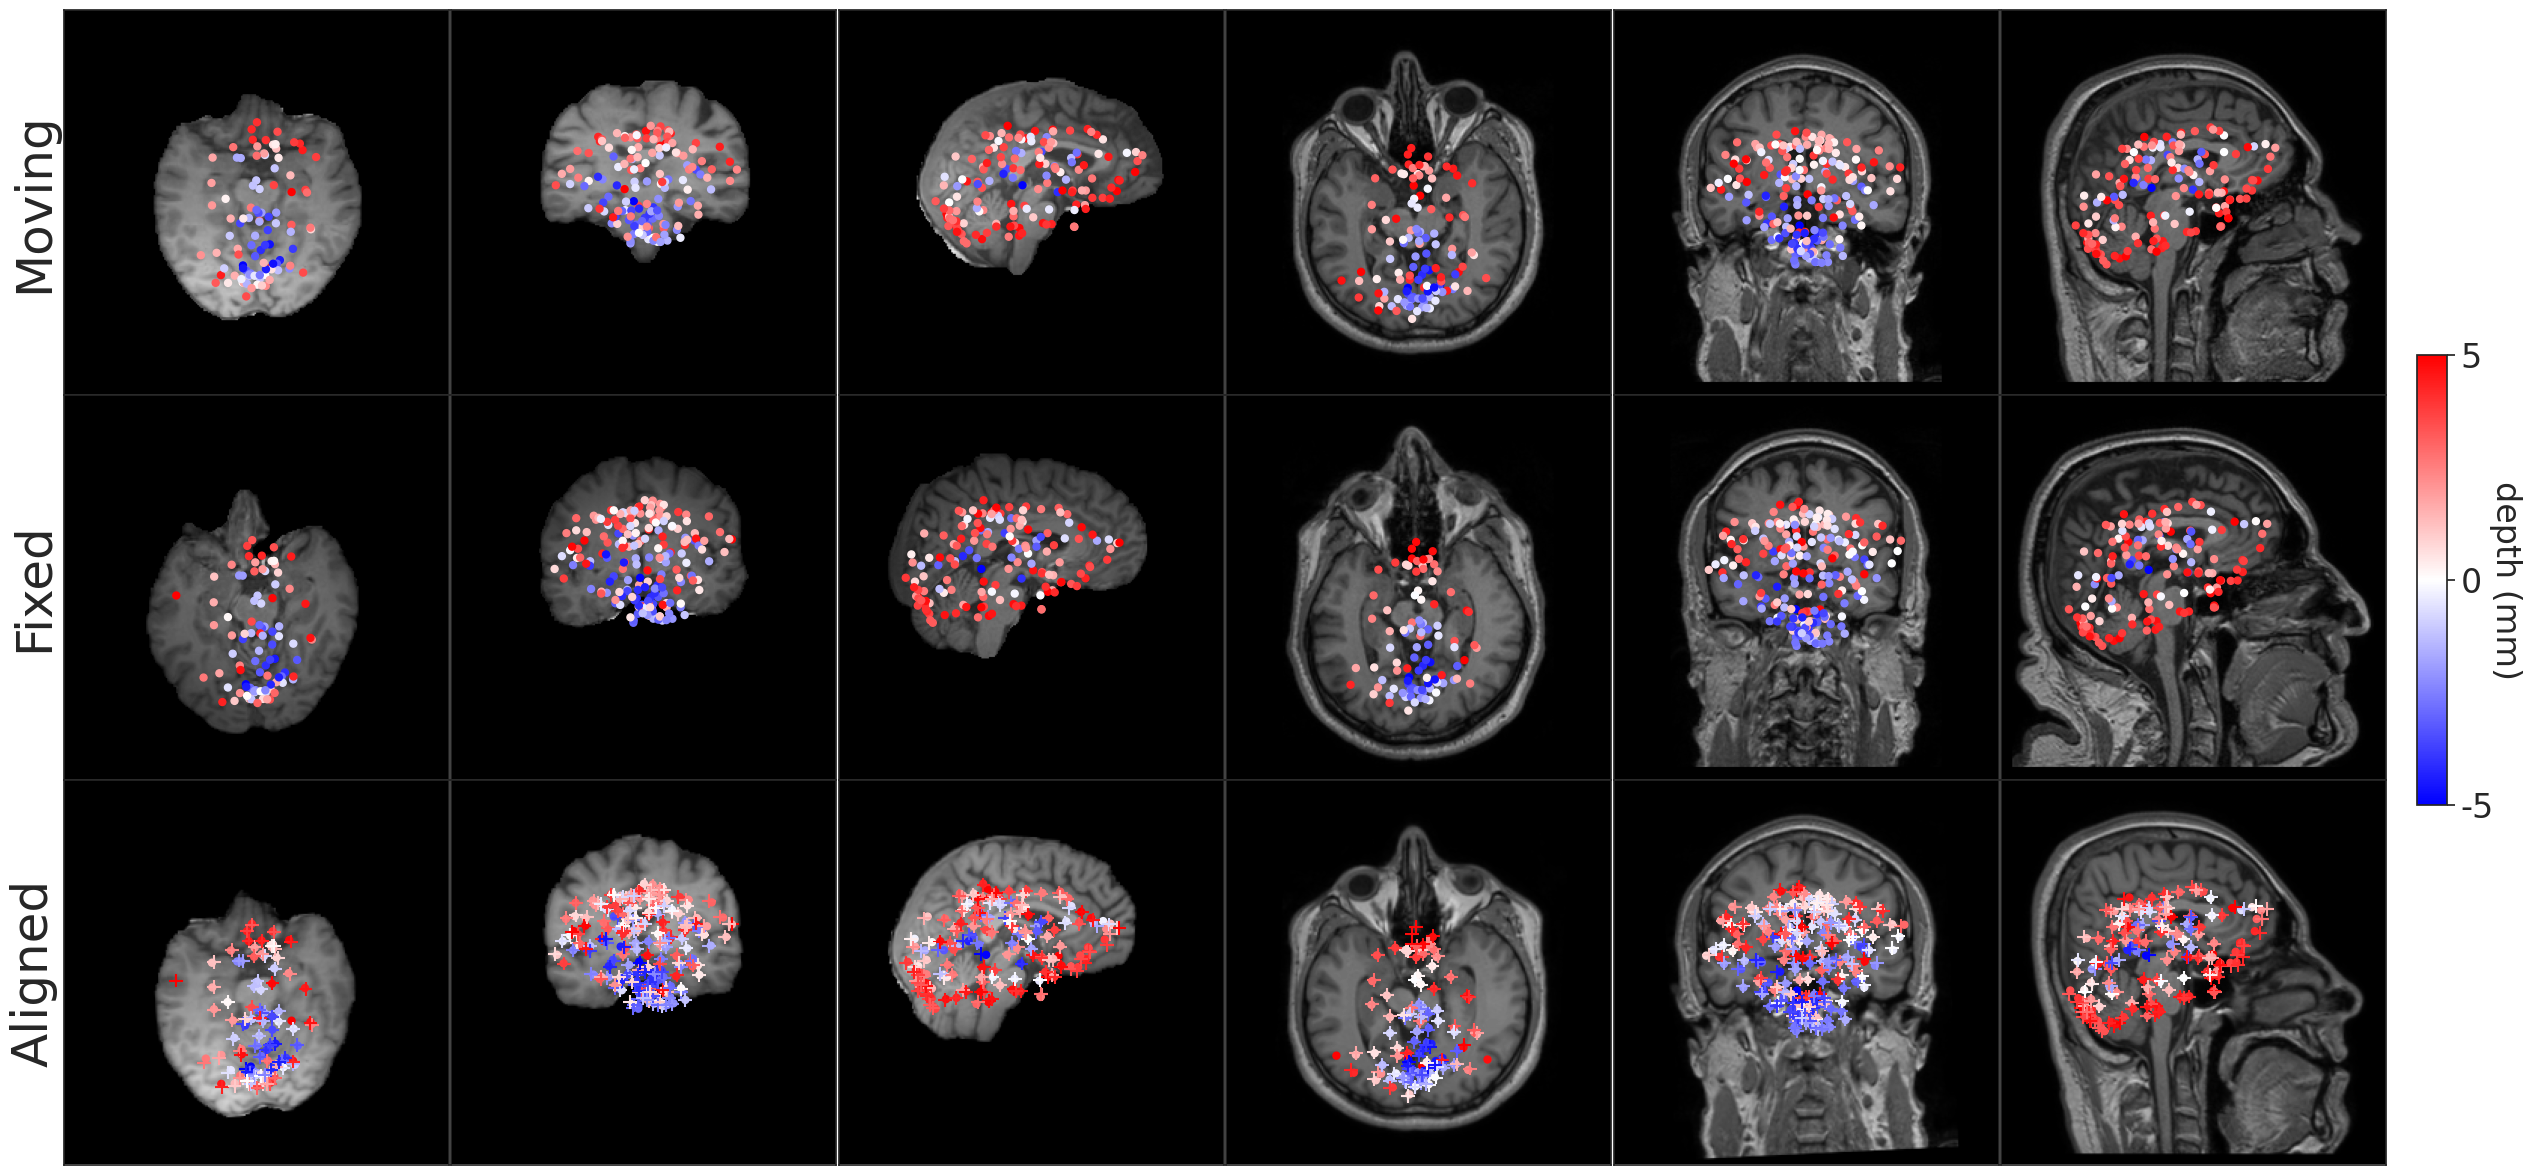

In [23]:
from keymorph.cm_plotter import show_img_and_points
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

# img_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_m_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0.npy'
# img_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_f_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1.npy'
# img_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
# points_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_m_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0.npy'
# points_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_f_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1.npy'
# points_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
# points_weights = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_weights_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
img_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_m_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0.npy'
img_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_f_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1.npy'
img_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
points_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_m_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0.npy'
points_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_f_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1.npy'
points_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
points_weights = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_weights_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'


img_m = np.load(img_m)
img_f = np.load(img_f)
img_a = np.load(img_a)

points_m = np.load(points_m)
points_f = np.load(points_f)
points_a = np.load(points_a)
weights = np.load(points_weights)
points_af = np.stack([points_a, points_f], axis=0)
print(points_af.shape)


fig, axes = plt.subplots(3, 6, figsize=(6*5, 3*5))
show_img_and_points(img_m[0], points_m, axes=(axes[0, 0], axes[0, 1], axes[0, 2]), rotate_90_deg=1)
show_img_and_points(img_f[0], points_f, axes=(axes[1, 0], axes[1, 1], axes[1, 2]), rotate_90_deg=1)
show_img_and_points(img_a[0], points_af, axes=(axes[2, 0], axes[2, 1], axes[2, 2]), rotate_90_deg=1)

img_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/img_m_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0.npy'
img_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/img_f_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1.npy'
img_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/img_a_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
points_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/points_m_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0.npy'
points_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/points_f_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1.npy'
points_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/points_a_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'

img_m = np.load(img_m)
img_f = np.load(img_f)
img_a = np.load(img_a)

points_m = np.load(points_m)
points_f = np.load(points_f)
points_a = np.load(points_a)
weights = np.load(points_weights)
points_af = np.stack([points_a, points_f], axis=0)

show_img_and_points(img_m[0], points_m, axes=(axes[0, 3], axes[0, 4], axes[0, 5]), rotate_90_deg=1)
show_img_and_points(img_f[0], points_f, axes=(axes[1, 3], axes[1, 4], axes[1, 5]), rotate_90_deg=1)
show_img_and_points(img_a[0], points_af, axes=(axes[2, 3], axes[2, 4], axes[2, 5]), rotate_90_deg=1)

axes[0, 0].set_ylabel('Moving', fontsize=36)
axes[1, 0].set_ylabel('Fixed', fontsize=36)
axes[2, 0].set_ylabel('Aligned', fontsize=36)

# Colorbar
cax = fig.add_axes([0.91, 0.35, 0.01, 0.3])
cmap = mpl.cm.bwr
norm = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('depth (mm)', rotation=270, fontsize=24)
cbar.ax.get_yaxis().set_ticks([-5, 0, 5])
cbar.ax.get_yaxis().set_ticklabels([-5, 0, 5], fontsize=24)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(os.path.join(save_fig_dir, 'imshow_points_ss_and_nss.png'),
            format='png', dpi=100, bbox_inches='tight')
plt.show()


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

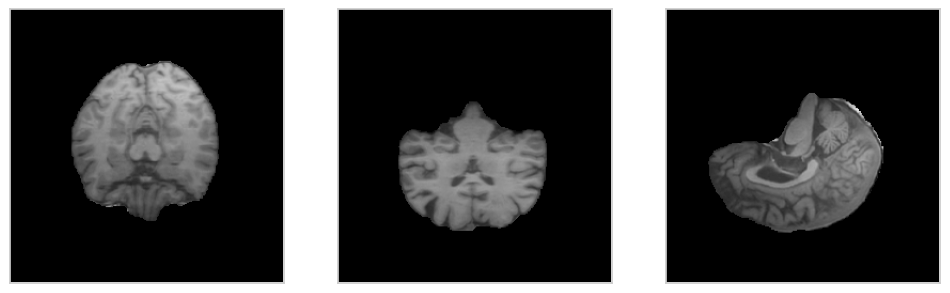

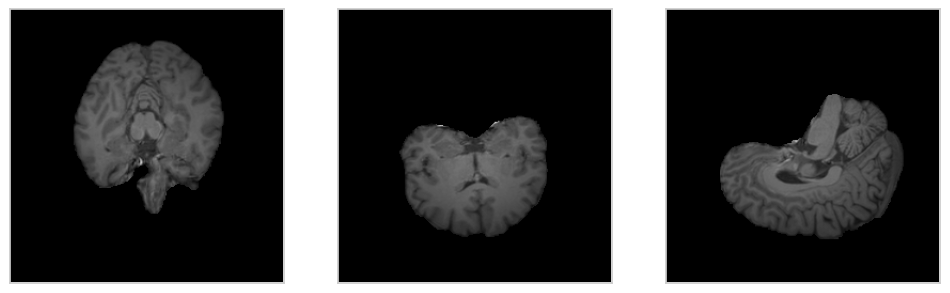

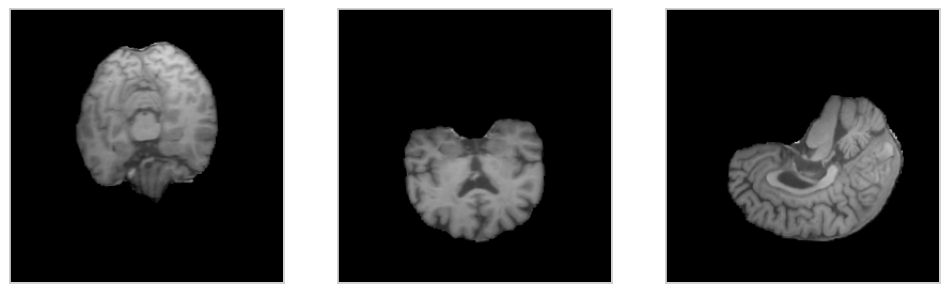

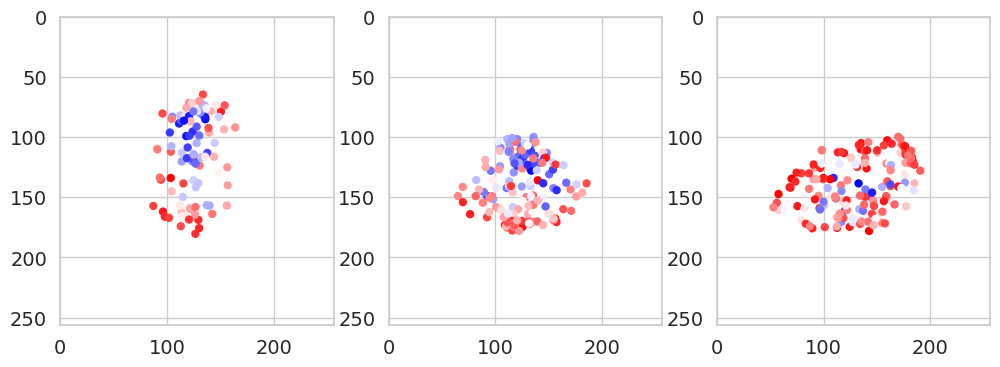

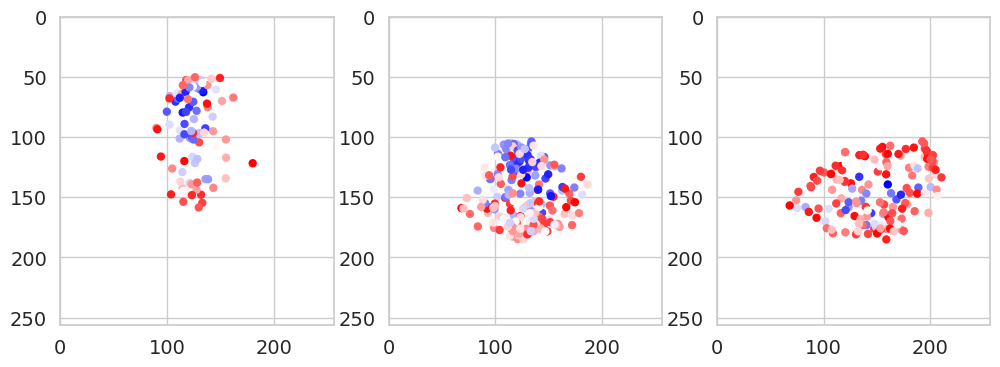

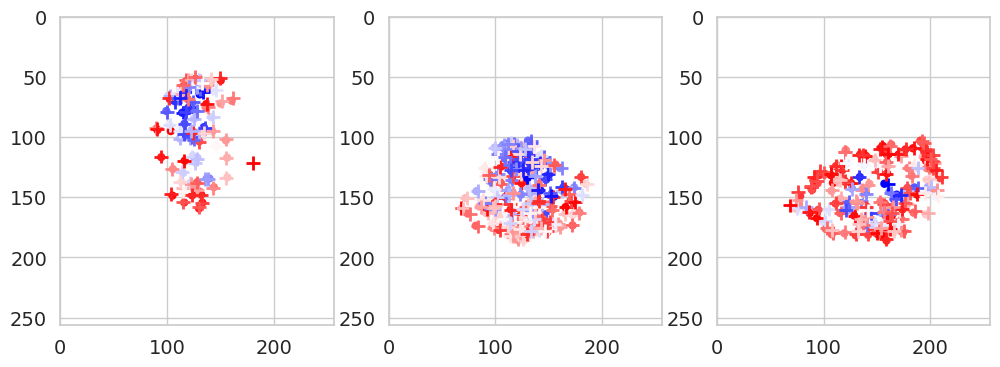

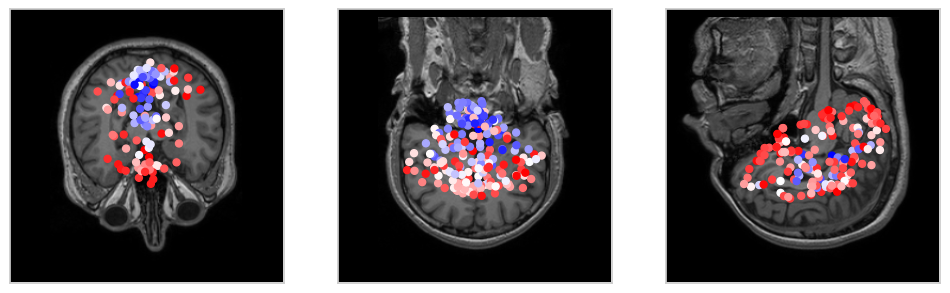

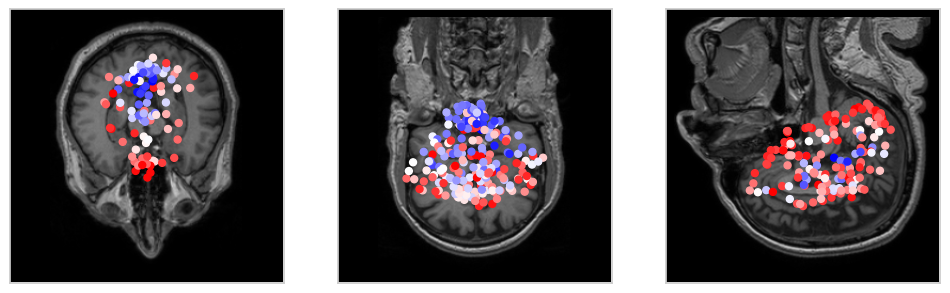

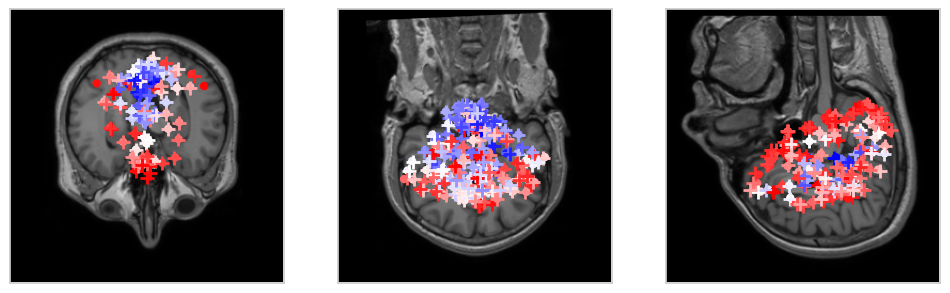

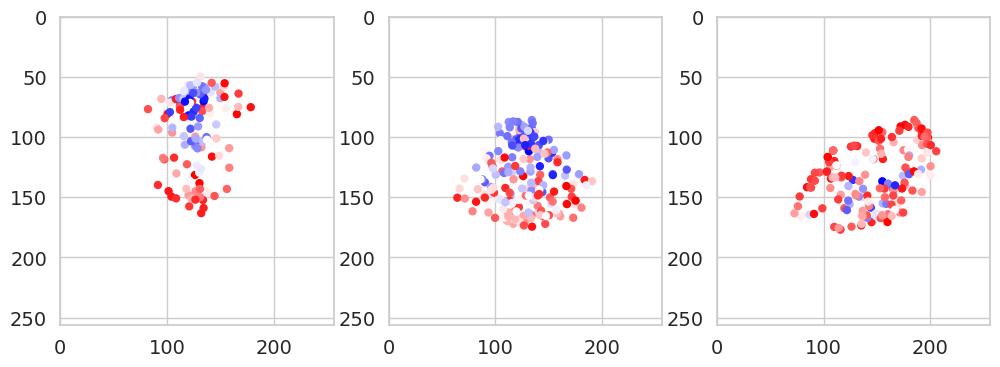

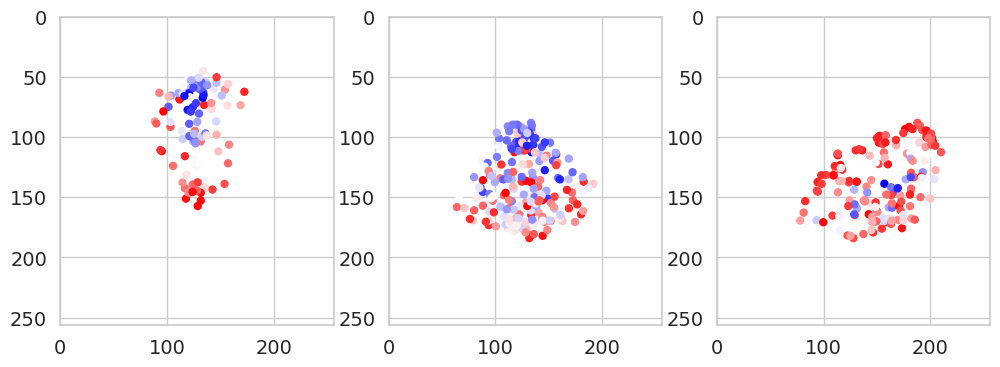

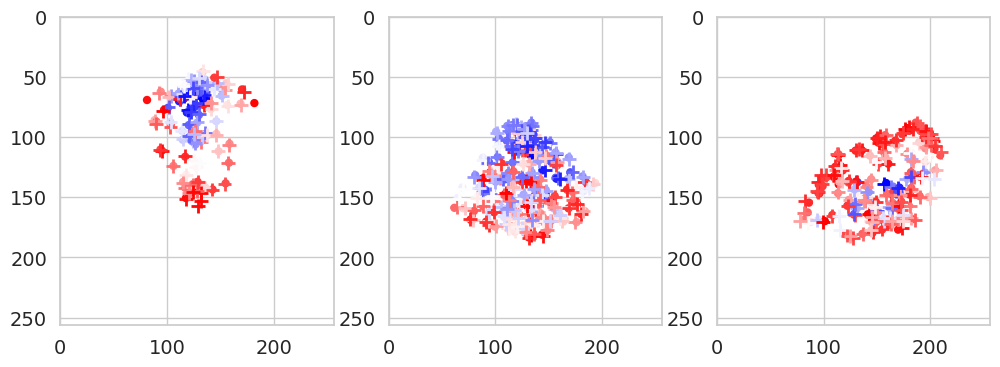

In [11]:
from keymorph.cm_plotter import show_img_and_points
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl


img_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_m_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0.npy'
img_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_f_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1.npy'
img_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/img_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
points_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_m_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0.npy'
points_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_f_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1.npy'
points_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
points_weights = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1/points_weights_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'


img_m = np.load(img_m)
img_f = np.load(img_f)
img_a = np.load(img_a)

points_m = np.load(points_m)
points_f = np.load(points_f)
points_a = np.load(points_a)
weights = np.load(points_weights)
points_af = np.stack([points_a, points_f], axis=0)


show_img_and_points(img=img_m[0], rotate_90_deg=3)
show_img_and_points(img=img_f[0], rotate_90_deg=3)
show_img_and_points(img=img_a[0], rotate_90_deg=3)
show_img_and_points(all_points=points_m, rotate_90_deg=3)
show_img_and_points(all_points=points_f, rotate_90_deg=3)
show_img_and_points(all_points=points_af, rotate_90_deg=3)

img_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/img_m_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0.npy'
img_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/img_f_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1.npy'
img_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/img_a_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
points_m = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/points_m_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0.npy'
points_f = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/points_f_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1.npy'
points_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-earlystopsubjects10-withharddiceroi-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/points_a_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_1-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'

img_m = np.load(img_m)
img_f = np.load(img_f)
img_a = np.load(img_a)

points_m = np.load(points_m)
points_f = np.load(points_f)
points_a = np.load(points_a)
weights = np.load(points_weights)
points_af = np.stack([points_a, points_f], axis=0)

show_img_and_points(img=img_m[0], all_points=points_m, rotate_90_deg=3)
show_img_and_points(img=img_f[0], all_points=points_f, rotate_90_deg=3)
show_img_and_points(img=img_a[0], all_points=points_af, rotate_90_deg=3)
show_img_and_points(all_points=points_m, rotate_90_deg=3)
show_img_and_points(all_points=points_f, rotate_90_deg=3)
show_img_and_points(all_points=points_af, rotate_90_deg=3)

# Line plots

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import re

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]
    
def load_data(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

def get_plot_data(data, metric, alignment):
    # Filter the keys based on the specified metric and alignment
    filtered_data = {
        key: values for key, values in data.items()
        if key.split(':')[0] == metric and key.split(':')[-1] == alignment
    }
    if len(filtered_data) == 0:
        raise ValueError('no data with that specified combination')
    
    # Extract augmentation types and corresponding values
    augmentations = []
    values = []
    for key in filtered_data.keys():
        # The format of the key is 'metric:fixed:moving:augmentation:alignment'
        parts = key.split(':')
        augmentation = parts[3]  # get the augmentation part
        if augmentation == 'rot180':
            continue
        for v in filtered_data[key]:
            augmentations.append(augmentation)
            values.append(v)

    # Sort augmentations and corresponding values based on natural sort order of augmentations
    aug_value_pairs = sorted(zip(augmentations, values), key=lambda x: natural_sort_key(x[0]))
    augmentations, values = zip(*aug_value_pairs)
    # print(natural_sort_key(augmentations))
        
    # Create a DataFrame for plotting
    plot_data = {
        'augmentation': augmentations,
        'values': values
    }
    return plot_data
    
def lineplot_metric_alignment(data_dicts, metric, alignments, title=None, ax=None):
    """
    Plots different augmentations for a specified metric and alignment type with confidence intervals.

    :param data: Dictionary containing the experiment results.
    :param metric: The metric to plot (e.g., 'harddice').
    :param alignment: The alignment type to plot (e.g., 'affine', 'rigid', 'syn').
    """
    ax = ax or plt.gca()
    sns.set(style="whitegrid")
    for (line_name, data), alignment in zip(data_dicts.items(), alignments):
        plot_data = get_plot_data(data, metric, alignment)
        ax = sns.lineplot(x="augmentation", 
                          y="values", 
                          data=plot_data, 
                          label=line_name, 
                          ax=ax, 
                          legend=False, 
                          linewidth=4,
                          marker='.',
                          markersize=20)

    if title:
        ax.set_title(title, fontsize=30)
    ax.set_xlabel('')
    if metric == 'harddice':
        metric_name = 'Dice'
    elif metric == 'hausd':
        metric_name = 'HD'
#     ax.set_ylabel(metric_name, fontsize=24)
    
    
    # plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()
    # plt.savefig(os.path.join(save_fig_dir, f'lineplot_{metric}_vs_rot_{title}'))
    # plt.show()

    return ax

## Pairwise, unimodal

In [13]:
paths_nonlinear = {
# '256, weighted, 0': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
# '256, weighted, 0.01': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
# '256, weighted, 0.1': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
# '256, weighted, 1': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
# '256, weighted, 10': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
'KeyMorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
'ITK-Elastix': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/',
# 'ants-synra': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/',
'ANTs': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants-syn-only_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval',
'SynthMorph': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__synthmorph_datasetgigamed_modelsynthmorph_keypoints0_batch1_normTypeinstance_lr3e-06/eval/',
}
alignments_nonlinear = [
#     'tps_0',
#     'tps_0.01',
#     'tps_0.1',
#     'tps_1',
#     'tps_10',
    'tps_10',
    'bspline',
#     'syn',
    'syn',
    'dense'
]

paths_affine = {
'256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
'itkelastix-numres4': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/',
'ants': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/',
}
alignments_affine = [
    'affine',
    'affine',
    'affine'
]

paths_rigid = {
'256, weighted': '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
'itkelastix-numres4': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/',
'ants': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval/',
}
alignments_rigid = [
    'rigid',
    'rigid',
    'rigid'
]

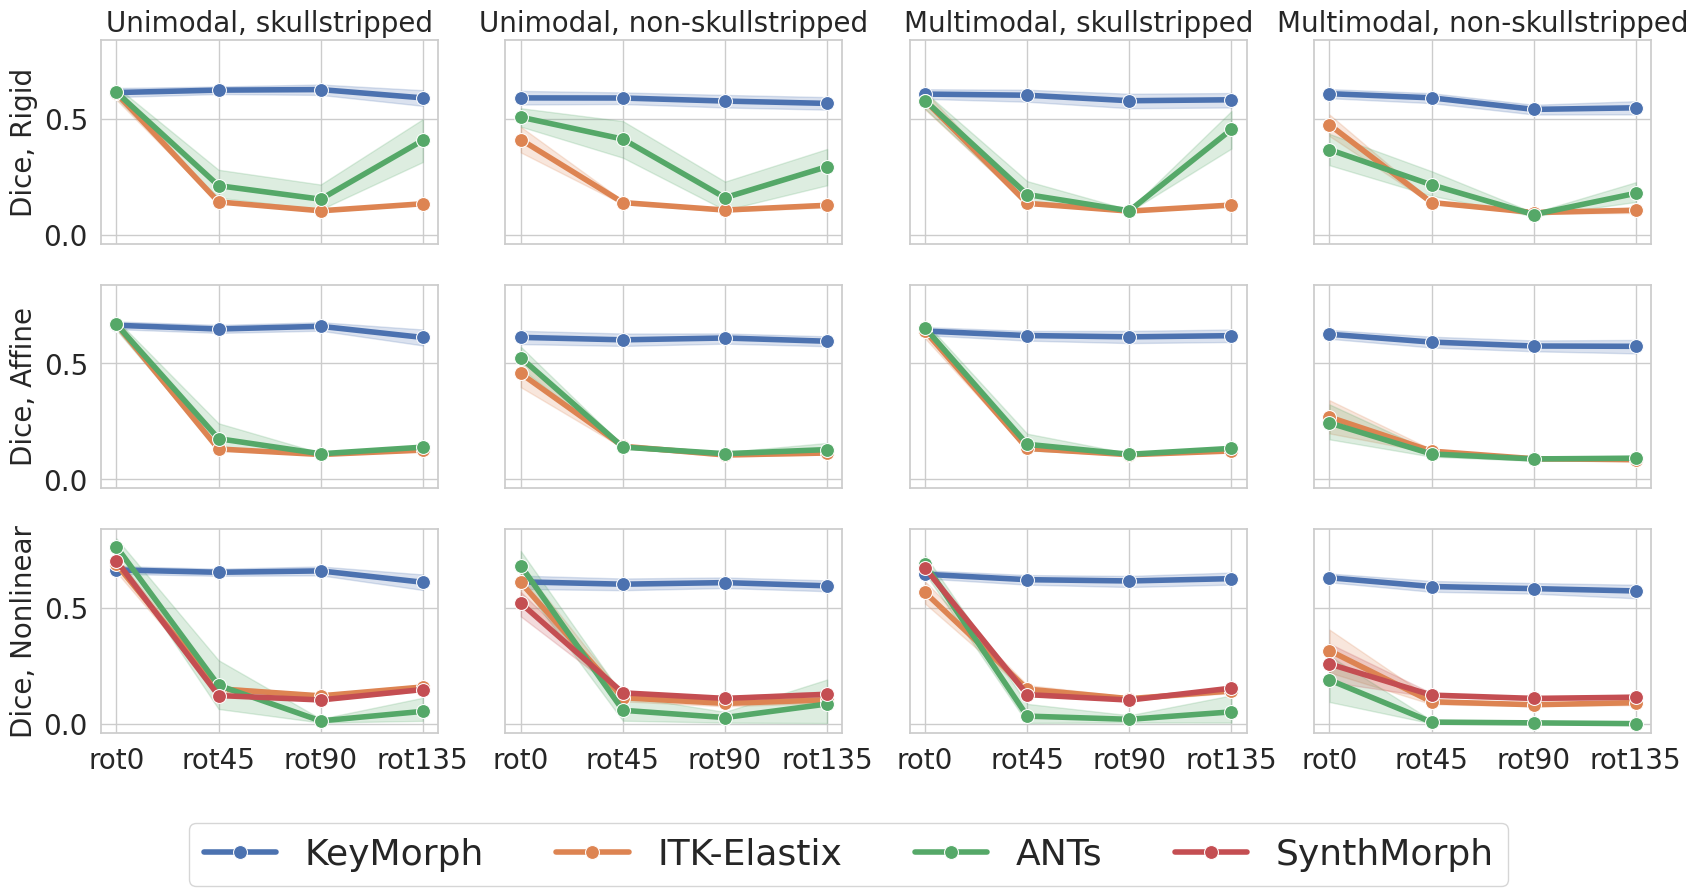

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(5*4, 3*3), sharey=True, sharex=True)
metric = 'harddice'
save_name_suffix = 'ss_nss_unimodal_multimodal'

json_name = 'summary_ss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 0]
                           )

json_name = 'summary_nss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 1]
                           )

json_name = 'summary_ss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 2]
                           )

json_name = 'summary_nss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 3]
                           )

L = axes[2, 0].legend(bbox_to_anchor=(0.16,-0.08), loc="lower left", 
            bbox_transform=fig.transFigure, ncol=5,
            fontsize=26)

axes[0, 0].set_title('Unimodal, skullstripped', fontsize=20)
axes[0, 1].set_title('Unimodal, non-skullstripped', fontsize=20)
axes[0, 2].set_title('Multimodal, skullstripped', fontsize=20)
axes[0, 3].set_title('Multimodal, non-skullstripped', fontsize=20)

axes[0, 0].set_ylabel('Dice, Rigid', fontsize=20)
axes[1, 0].set_ylabel('Dice, Affine', fontsize=20)
axes[2, 0].set_ylabel('Dice, Nonlinear', fontsize=20)

[ax.tick_params(axis='both', labelsize=20) for ax in axes.ravel()]
plt.savefig(os.path.join(save_fig_dir, f'lineplot_{metric}_vs_rot_{save_name_suffix}.png'),
           format='png', dpi=100, bbox_inches='tight')
plt.show()

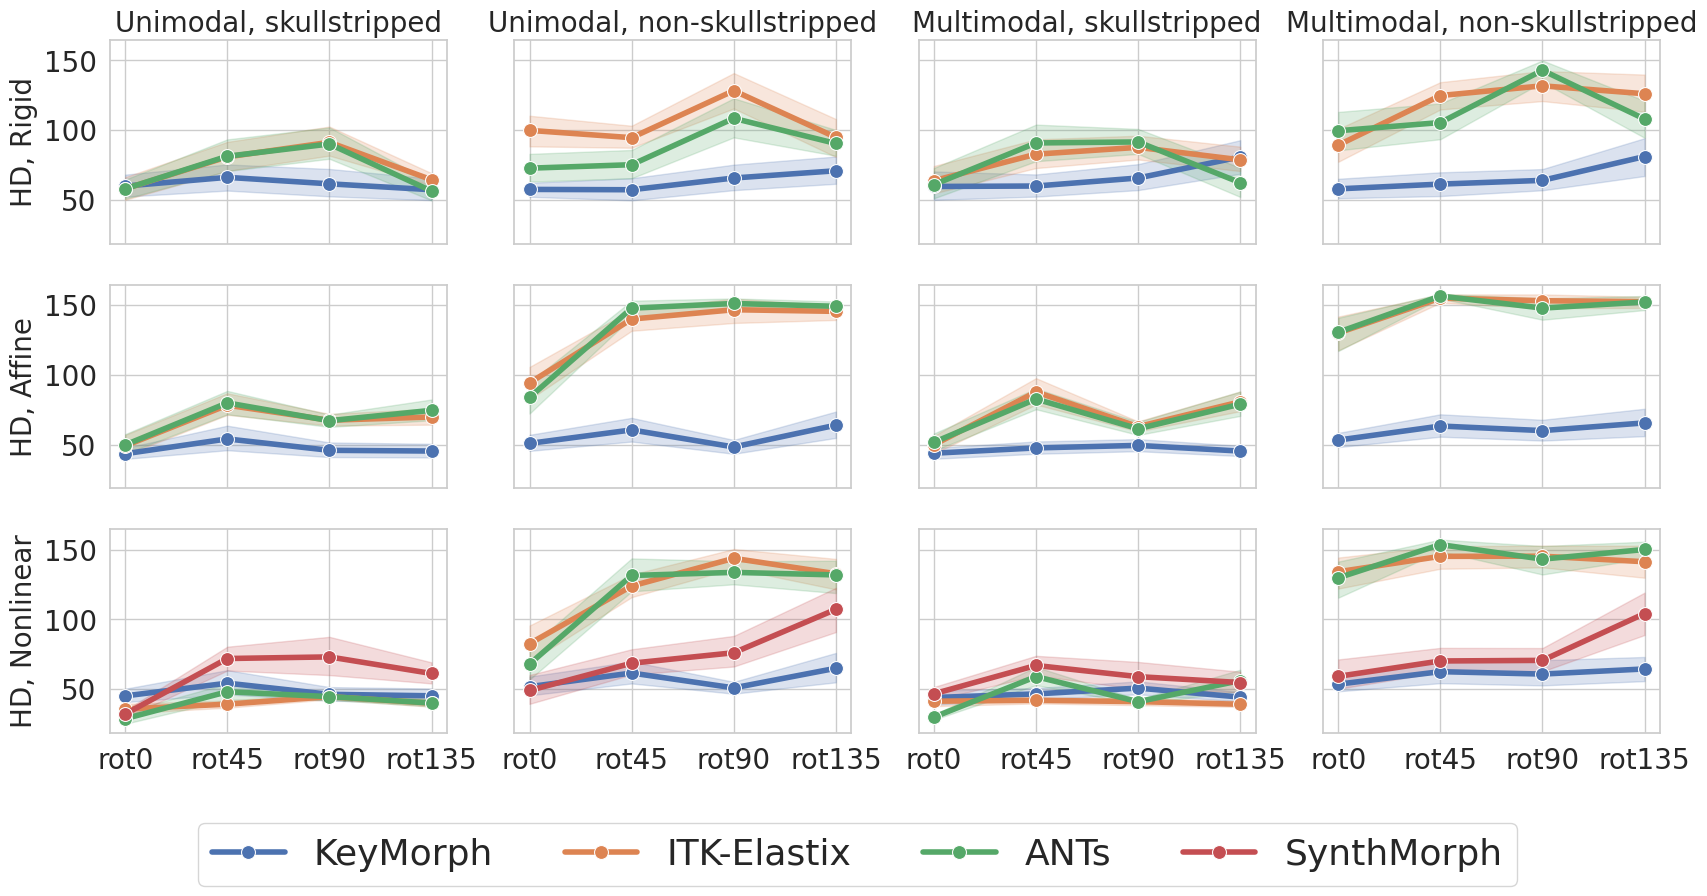

In [15]:
fig, axes = plt.subplots(3, 4, figsize=(5*4, 3*3), sharey=True, sharex=True)
metric = 'hausd'
save_name_suffix = 'ss_nss_unimodal_multimodal'

json_name = 'summary_ss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 0]
                           )

json_name = 'summary_nss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 1]
                           )

json_name = 'summary_ss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 2]
                           )

json_name = 'summary_nss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 3]
                           )

L = axes[2, 0].legend(bbox_to_anchor=(0.16,-0.08), loc="lower left", 
            bbox_transform=fig.transFigure, ncol=5,
            fontsize=26)

axes[0, 0].set_title('Unimodal, skullstripped', fontsize=20)
axes[0, 1].set_title('Unimodal, non-skullstripped', fontsize=20)
axes[0, 2].set_title('Multimodal, skullstripped', fontsize=20)
axes[0, 3].set_title('Multimodal, non-skullstripped', fontsize=20)

axes[0, 0].set_ylabel('HD, Rigid', fontsize=20)
axes[1, 0].set_ylabel('HD, Affine', fontsize=20)
axes[2, 0].set_ylabel('HD, Nonlinear', fontsize=20)

[ax.tick_params(axis='both', labelsize=20) for ax in axes.ravel()]

plt.savefig(os.path.join(save_fig_dir, f'lineplot_{metric}_vs_rot_{save_name_suffix}.png'),
           format='png', dpi=100, bbox_inches='tight')
plt.show()

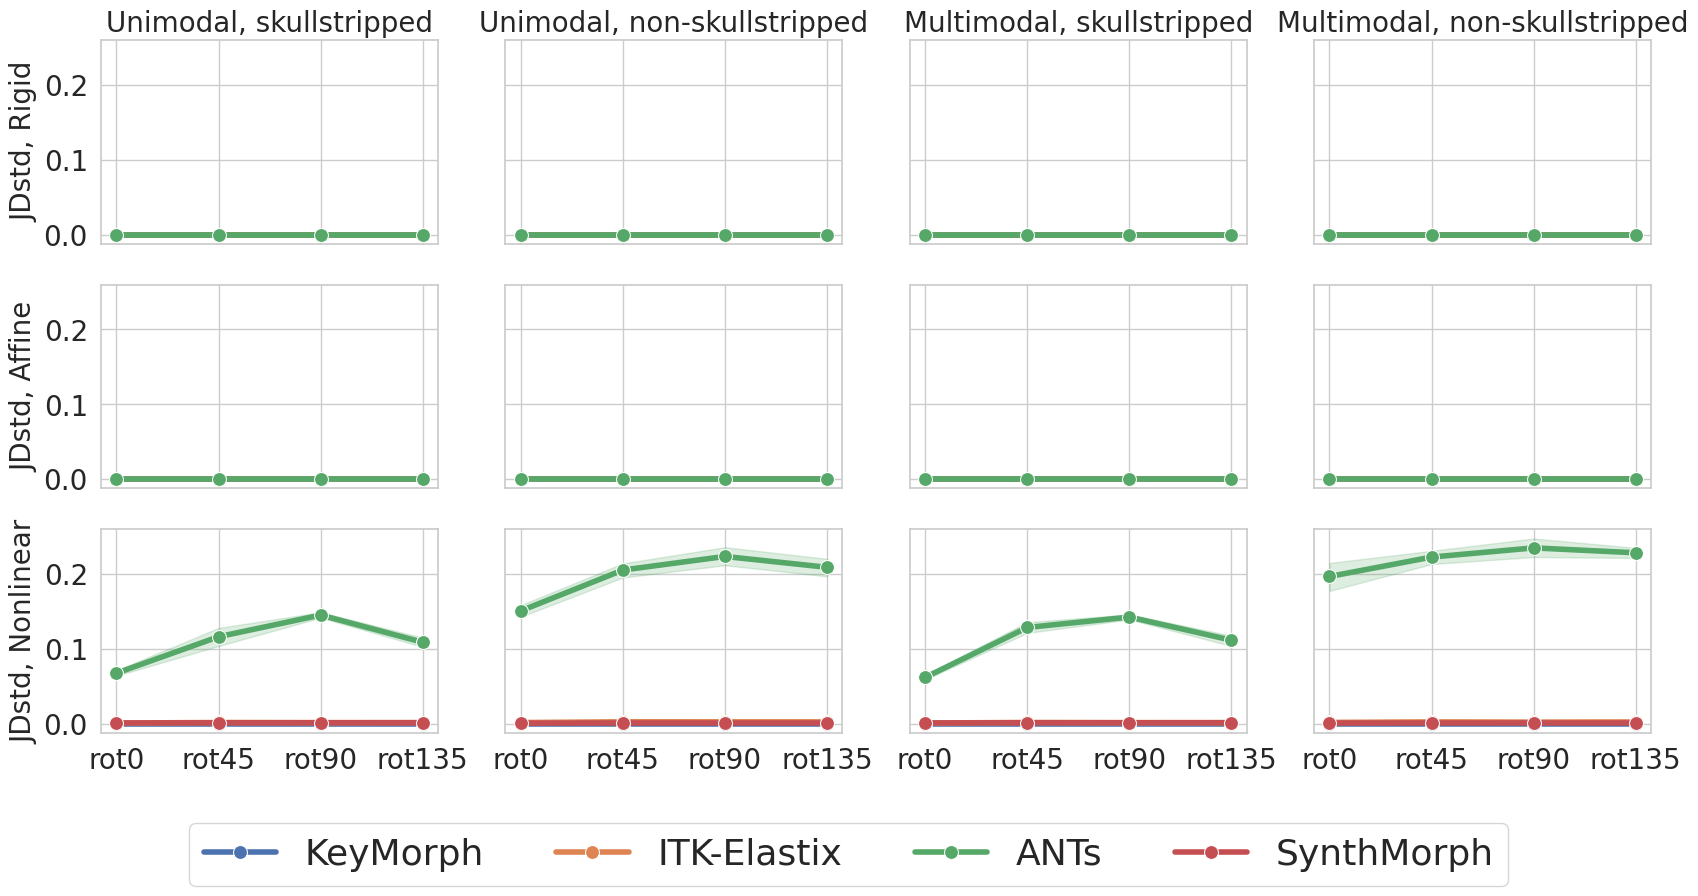

In [16]:
fig, axes = plt.subplots(3, 4, figsize=(5*4, 3*3), sharey=True, sharex=True)
metric = 'jdstd'
save_name_suffix = 'ss_nss_unimodal_multimodal'

json_name = 'summary_ss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 0]
                           )

json_name = 'summary_nss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 1]
                           )

json_name = 'summary_ss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 2]
                           )

json_name = 'summary_nss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 3]
                           )

L = axes[2, 0].legend(bbox_to_anchor=(0.16,-0.08), loc="lower left", 
            bbox_transform=fig.transFigure, ncol=5,
            fontsize=26)

axes[0, 0].set_title('Unimodal, skullstripped', fontsize=20)
axes[0, 1].set_title('Unimodal, non-skullstripped', fontsize=20)
axes[0, 2].set_title('Multimodal, skullstripped', fontsize=20)
axes[0, 3].set_title('Multimodal, non-skullstripped', fontsize=20)

axes[0, 0].set_ylabel('JDstd, Rigid', fontsize=20)
axes[1, 0].set_ylabel('JDstd, Affine', fontsize=20)
axes[2, 0].set_ylabel('JDstd, Nonlinear', fontsize=20)

[ax.tick_params(axis='both', labelsize=20) for ax in axes.ravel()]

plt.savefig(os.path.join(save_fig_dir, f'lineplot_{metric}_vs_rot_{save_name_suffix}.png'),
           format='png', dpi=100, bbox_inches='tight')
plt.show()

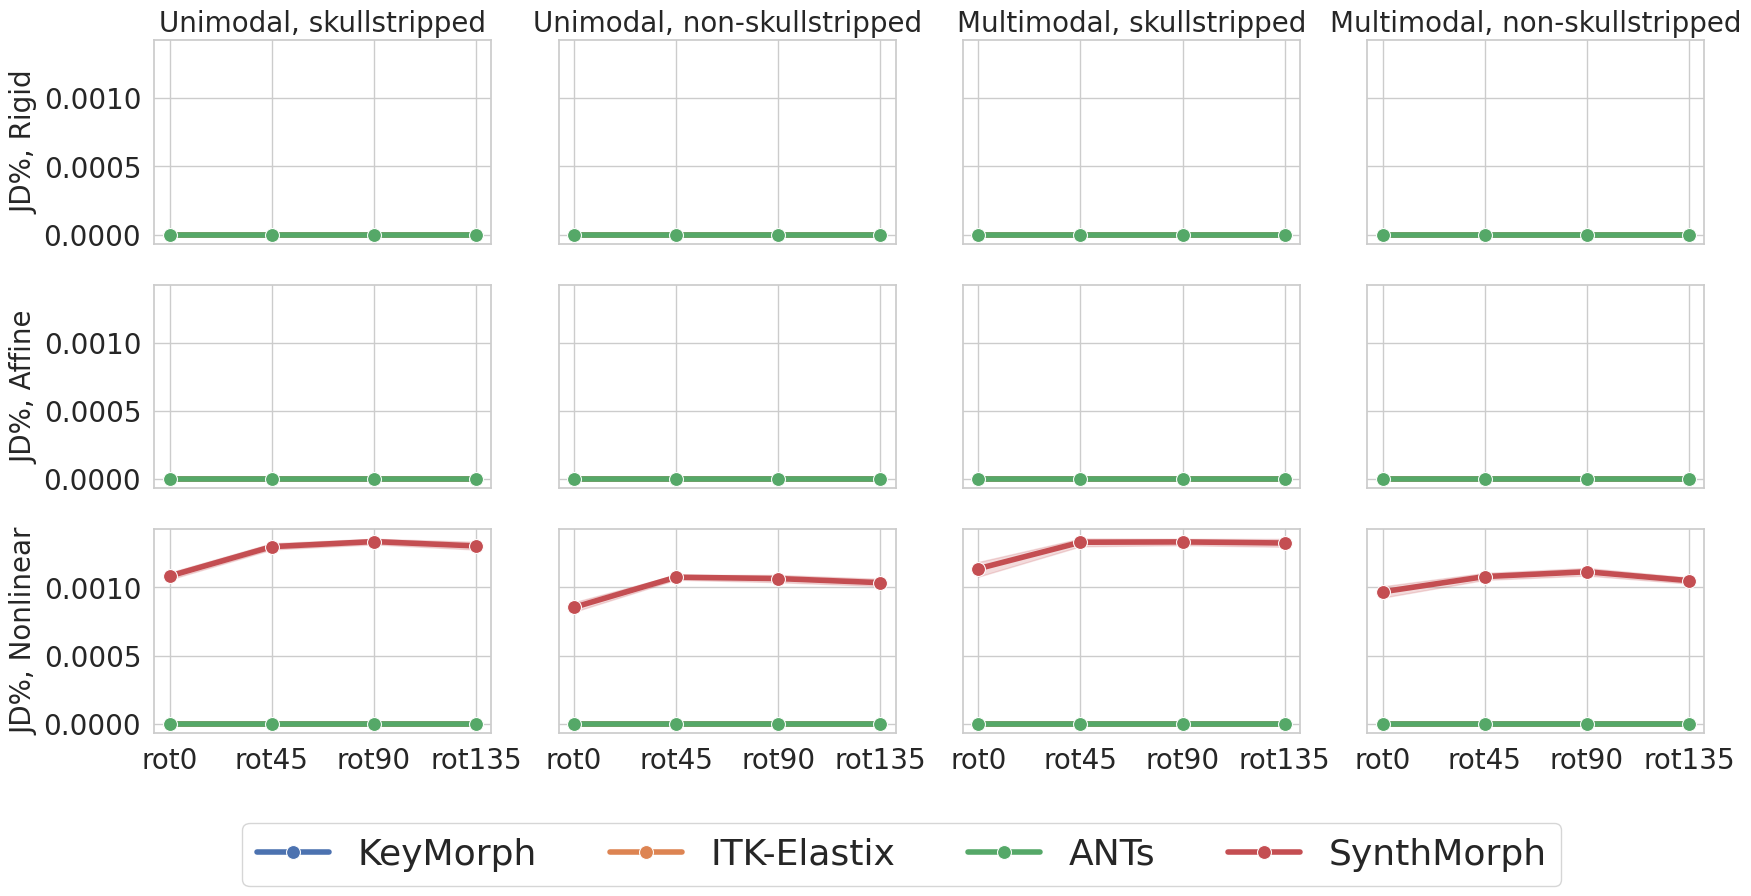

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(5*4, 3*3), sharey=True, sharex=True)
metric = 'jdlessthan0'
save_name_suffix = 'ss_nss_unimodal_multimodal'

json_name = 'summary_ss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 0]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 0]
                           )

json_name = 'summary_nss_unimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 1]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 1]
                           )

json_name = 'summary_ss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 2]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 2]
                           )

json_name = 'summary_nss_multimodal.json'
lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_rigid.items()}, 
                                  metric, 
                                  alignments_rigid, 
                                  ax=axes[0, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_affine.items()}, 
                                  metric, 
                                  alignments_affine, 
                                  ax=axes[1, 3]
                           )

lineplot_metric_alignment({k: load_data(os.path.join(v, json_name)) for k, v in paths_nonlinear.items()}, 
                                  metric, 
                                  alignments_nonlinear, 
                                  ax=axes[2, 3]
                           )

L = axes[2, 0].legend(bbox_to_anchor=(0.16,-0.08), loc="lower left", 
            bbox_transform=fig.transFigure, ncol=5,
            fontsize=26)

axes[0, 0].set_title('Unimodal, skullstripped', fontsize=20)
axes[0, 1].set_title('Unimodal, non-skullstripped', fontsize=20)
axes[0, 2].set_title('Multimodal, skullstripped', fontsize=20)
axes[0, 3].set_title('Multimodal, non-skullstripped', fontsize=20)

axes[0, 0].set_ylabel('JD%, Rigid', fontsize=20)
axes[1, 0].set_ylabel('JD%, Affine', fontsize=20)
axes[2, 0].set_ylabel('JD%, Nonlinear', fontsize=20)

[ax.tick_params(axis='both', labelsize=20) for ax in axes.ravel()]

plt.savefig(os.path.join(save_fig_dir, f'lineplot_{metric}_vs_rot_{save_name_suffix}.png'),
           format='png', dpi=100, bbox_inches='tight')
plt.show()

## Groupwise templates

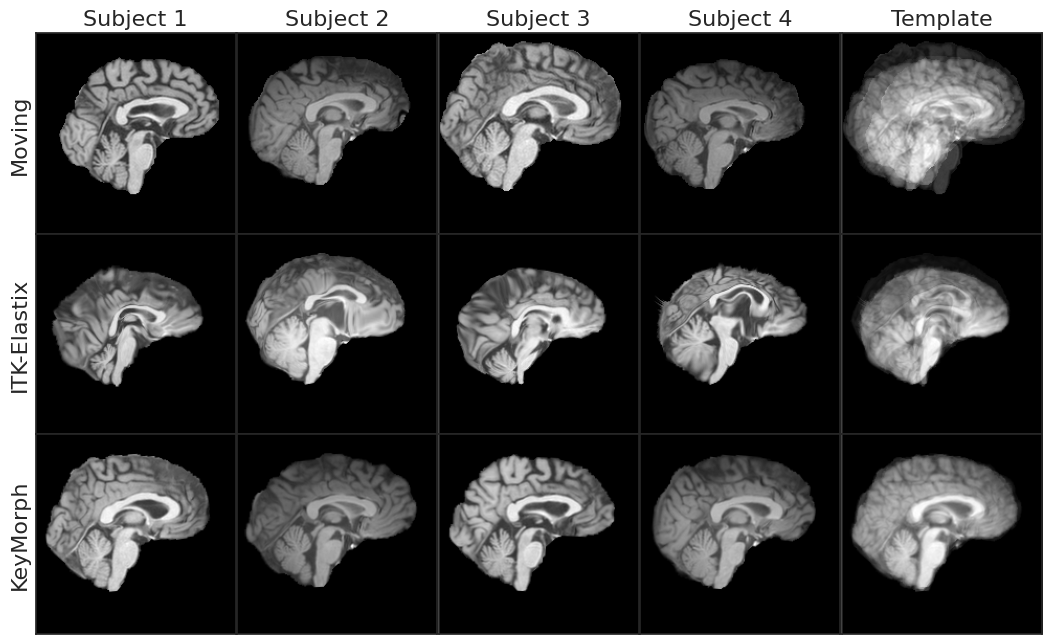

In [18]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


def imshow_group_and_template(moving_paths, keymorph_paths, itkelastix_paths):
    sns.set(style="white")
    fig, axes = plt.subplots(3, len(moving_paths)+1, figsize=(3*len(moving_paths)+1, 2.6*3))
    [ax.set_xticks([]) for ax in axes.ravel()]
    [ax.set_yticks([]) for ax in axes.ravel()]
    running_tot_m = np.zeros((1, 1, 256, 256, 256))
    running_tot_key = np.zeros((1, 1, 256, 256, 256))
    running_tot_itk = np.zeros((1, 1, 256, 256, 256))

    for i, (path_m, path_key, path_itk) in enumerate(zip(moving_paths, keymorph_paths, itkelastix_paths)):
        vol_m = np.load(path_m)
        vol_key = np.load(path_key)
        vol_itk = np.load(path_itk)
        
        vol_m = np.rot90(vol_m, k=3, axes=(-1, -2))
        vol_key = np.rot90(vol_key, k=3, axes=(-1, -2))
        vol_itk = np.rot90(vol_itk, k=3, axes=(-1, -2))
        running_tot_m += vol_m
        running_tot_key += vol_key
        running_tot_itk += vol_itk
        
        
        axes[0, i].imshow(vol_m[0,0,128, 32:-32, 32:-32], cmap='gray')
        axes[2, i].imshow(vol_key[0,0,128, 32:-32, 32:-32], cmap='gray')
        axes[1, i].imshow(vol_itk[0,0,128, 32:-32, 32:-32], cmap='gray')

    template_m = running_tot_m / len(moving_paths)
    template_key = running_tot_key / len(moving_paths)
    template_itk = running_tot_itk / len(moving_paths)
    axes[0, -1].imshow(template_m[0,0,128, 32:-32, 32:-32], cmap='gray')
    axes[2, -1].imshow(template_key[0,0,128, 32:-32, 32:-32], cmap='gray')
    axes[1, -1].imshow(template_itk[0,0,128, 32:-32, 32:-32], cmap='gray')
    
    axes[0, 0].set_title('Subject 1', fontsize=16)
    axes[0, 1].set_title('Subject 2', fontsize=16)
    axes[0, 2].set_title('Subject 3', fontsize=16)
    axes[0, 3].set_title('Subject 4', fontsize=16)
    axes[0, 4].set_title('Template', fontsize=16)
    
    axes[0, 0].set_ylabel('Moving', fontsize=16)
    axes[1, 0].set_ylabel('ITK-Elastix', fontsize=16)
    axes[2, 0].set_ylabel('KeyMorph', fontsize=16)
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(os.path.join(save_fig_dir, 'imshow_groupwise.png'),
               format='png', dpi=100, bbox_inches='tight')
    plt.show()
    
keymorph_128_m = glob('/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/img_m/*.npy')
keymorph_128_a = glob('/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/img_a/*.npy')
itkelastix = glob('/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval/ss_group/nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1_rot0_4/img_a/*.npy')

imshow_group_and_template(keymorph_128_m, keymorph_128_a, itkelastix)

# Representative slices

/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_multimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5085_IXIPD/img_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2_1-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5085_IXIPD-rot0-affine.npy
/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/ss_multimodal/0_1_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2_nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5085_IXIPD/img_a_0-nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5

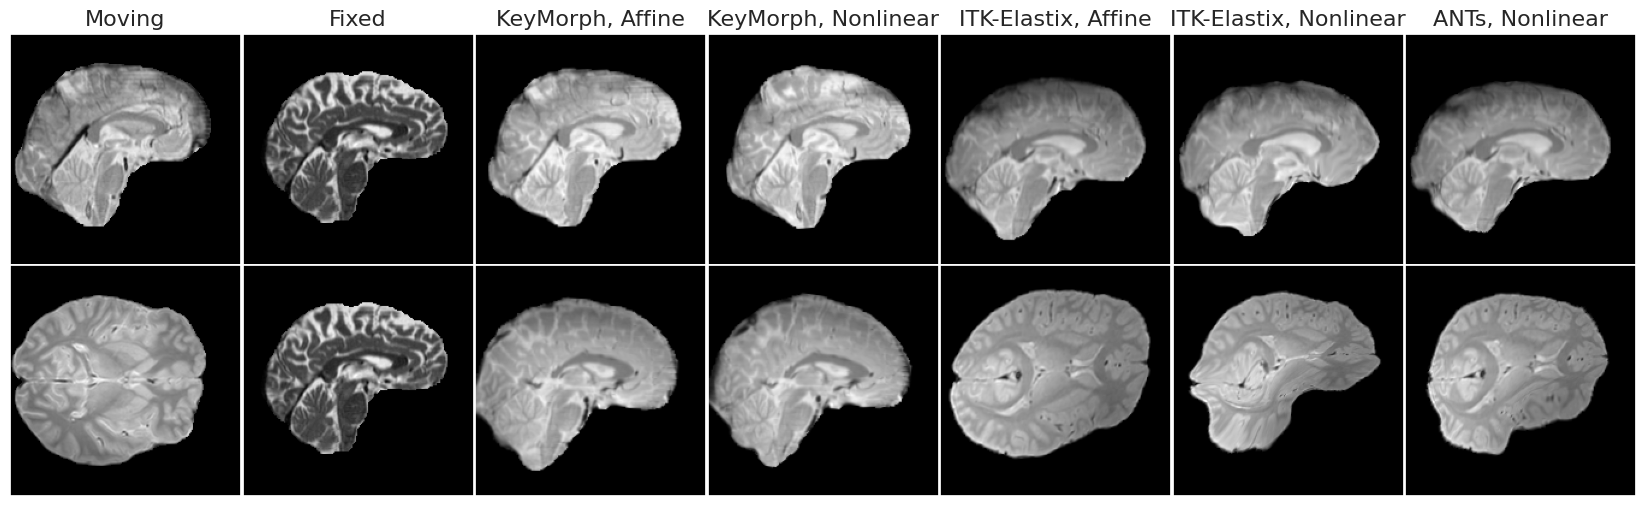

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

def load_img_f(model_dir, exp_name, ids, mods, rot_angle):
    id_f, id_m = ids
    mod_f, mod_m = mods
    registration_dir = os.path.join(model_dir, f'{exp_name}/{id_f}_{id_m}_{mod_f}_{mod_m}')
    fixed_path = os.path.join(registration_dir, f'img_f_{id_f}-{mod_f}.npy')
    return np.load(fixed_path)

def load_img_m(model_dir, exp_name, ids, mods, rot_angle):
    id_f, id_m = ids
    mod_f, mod_m = mods
    registration_dir = os.path.join(model_dir, f'{exp_name}/{id_f}_{id_m}_{mod_f}_{mod_m}')
    moving_path = os.path.join(registration_dir, f'img_m_{id_m}-{mod_m}-rot{rot_angle}.npy')
    return np.load(moving_path)

def load_img_a(model_dir, exp_name, ids, mods, rot_angle, align_type):
    id_f, id_m = ids
    mod_f, mod_m = mods
    registration_dir = os.path.join(model_dir, f'{exp_name}/{id_f}_{id_m}_{mod_f}_{mod_m}')
    aligned_path = os.path.join(registration_dir, f'img_a_{id_f}-{mod_f}_{id_m}-{mod_m}-rot{rot_angle}-{align_type}.npy')
    print(aligned_path)
    if 'synthmorph' in model_dir:
        return np.rot90(np.load(aligned_path), axes=(-1, -2))
    return np.load(aligned_path)

def plot_row(model_dirs, align_types, exp_name, ids, mods, rot_angle, axes=None):
    num_cols = len(model_dirs)+2
    if axes is None:
        fig, axes = plt.subplots(1, num_cols, figsize=(num_cols*3, 3))
    
    img_m = load_img_m(model_dirs[0], exp_name, ids, mods, rot_angle)
    img_f = load_img_f(model_dirs[0], exp_name, ids, mods, rot_angle)

    axes[0].imshow(np.rot90(img_m[0, 128, 32:-32, 32:-32]), cmap='gray')
    axes[1].imshow(np.rot90(img_f[0, 128, 32:-32, 32:-32]), cmap='gray')
    for i, (model_dir, align_type) in enumerate(zip(model_dirs, align_types)):
        img_a = load_img_a(model_dir, exp_name, ids, mods, rot_angle, align_type)
        axes[i+2].imshow(np.rot90(img_a[0, 128, 32:-32, 32:-32]), cmap='gray')
    return axes

def plot_images(model_dict, all_align_types, exp_names, all_ids, all_mods, rot_angles):
    num_rows = len(exp_names)
    num_cols = len(model_dict)+2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*3, num_rows*3))
    if num_rows == 0:
        axes = [axes]
    
    for i, (exp_name, ids, mods, rot_angle, align_types) in enumerate(zip(exp_names, all_ids, all_mods, rot_angles, all_align_types)):
        plot_row(list(model_dict.values()), align_types, exp_name, ids, mods, rot_angle, axes=axes[i])

    axes[0, 0].set_title('Moving', fontsize=16)
    axes[0, 1].set_title('Fixed', fontsize=16)
    [ax.set_title(title, fontsize=16) for title, ax in zip(model_dict.keys(), axes[0, 2:])]
    [ax.set_xticks([]) for ax in axes.ravel()]
    [ax.set_yticks([]) for ax in axes.ravel()]
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(os.path.join(save_fig_dir, 'imshow_pairwise.png'),
               format='png', dpi=100, bbox_inches='tight')
    plt.show()
    
model_dict = {
    'KeyMorph, Affine':    '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
    'KeyMorph, Nonlinear':    '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-ACTUALLYWEIGHTED-lesion-normal-skullstrip-nonskullstrip-256_datasetgigamed_modelkeymorph_keypoints256_batch1_normTypeinstance_lr3e-06/eval/',
    'ITK-Elastix, Affine': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval',
    'ITK-Elastix, Nonlinear': '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__itkelastix-numres4_datasetgigamed_modelitkelastix_keypoints0_batch1_normTypeinstance_lr3e-06/eval',
    'ANTs, Nonlinear':        '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__ants-syn-only_datasetgigamed_modelants_keypoints0_batch1_normTypeinstance_lr3e-06/eval',
#     'SynthMorph, Nonlinear':  '/midtier/sablab/scratch/alw4013/keymorph/experiments/baselines/__eval__synthmorph_datasetgigamed_modelsynthmorph_keypoints0_batch1_normTypeinstance_lr3e-06/eval',
}

exp_name = [
    'ss_multimodal',
    'ss_multimodal',
]
ids = [
    (0, 1),
    (0, 1),
]
mods = [
    ('nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2',
     'nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5085_IXIPD'),
    ('nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2',
     'nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5085_IXIPD'),
    ('nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2',
     'nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5085_IXIPD'),
    ('nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2',
     'nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5085_IXIPD'),
#     ('nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1',
#      'nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1'),
#     ('nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5083_IXIT1',
#      'nnUNet_1mmiso_256x256x256_MNI_HD-BET_preprocessed-Dataset5084_IXIT2'),
]
rot_angle = [
    0, 
    90, 
]
align_type = [
    ('affine', 'tps_0', 'affine', 'bspline', 'syn'), 
    ('affine', 'tps_0', 'affine', 'bspline', 'syn'), 
#     'affine', 
#     'affine'
]
plot_images(model_dict, align_type, exp_name, ids, mods, rot_angle)

# Timing

# Quantifying keypoints in structures

In [20]:
def remap_keypoints(keypoints, segmentation_shape):
    """
    Remap keypoints from [-1, 1]^3 to segmentation voxel space.
    
    Args:
    keypoints: NumPy array of shape (batch_size, N, 3), normalized keypoints.
    segmentation_shape: Tuple of 3 ints, shape of the segmentation (depth, height, width).
    
    Returns:
    Remapped keypoints in voxel space.
    """
    # Calculate scale factors for each dimension
    scale_factors = np.array(segmentation_shape) - 1
    
    # Remap from [-1, 1] to [0, scale_factor]
    remapped_keypoints = (keypoints + 1) / 2 * scale_factors
    
    # Ensure that keypoints do not exceed segmentation boundaries
    remapped_keypoints = np.clip(remapped_keypoints, 0, scale_factors)
    
    return remapped_keypoints.astype(int)

def quantify_structure(remapped_keypoints, segmentation):
    """
    Determine which structure each keypoint falls into.
    
    Args:
    remapped_keypoints: NumPy array of shape (batch_size, N, 3), keypoints in voxel space.
    segmentation: NumPy array of shape (batch_size, 1, depth, height, width), segmentation.
    
    Returns:
    Structure indices for each keypoint.
    """
    batch_size, N, _ = remapped_keypoints.shape
    
    # Prepare an array to hold the structure indices
    structure_indices = np.empty((batch_size, N), dtype=int)
    
    for i in range(batch_size):
        for j in range(N):
            # Index the segmentation with the remapped keypoint coordinates
            structure_indices[i, j] = segmentation[i, 0,
                                                   remapped_keypoints[i, j, 0],
                                                   remapped_keypoints[i, j, 1],
                                                   remapped_keypoints[i, j, 2]]
            
    return structure_indices

img_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_0_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/seg_a_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'
points_a = '/midtier/sablab/scratch/alw4013/keymorph/experiments/truncatedunet1/__eval__gigamed-weighted-lesion-normal-skullstrip-nonskullstrip-128_datasetgigamed_modelkeymorph_keypoints128_batch1_normTypeinstance_lr3e-06/eval/nss_unimodal/0_0_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1/points_a_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1_0-nnUNet_1mmiso_256x256x256_MNI_preprocessed-Dataset5083_IXIT1-rot0-affine.npy'

# Example usage
batch_size = 2
N = 5
keypoints = np.load(points_a)[None]
segmentation = np.load(img_a)[None]

# Remap keypoints to segmentation space
remapped_keypoints = remap_keypoints(keypoints, segmentation_shape=(256, 256, 256))

# Quantify which structure each keypoint falls into
structure_indices = quantify_structure(remapped_keypoints, segmentation)

print(structure_indices)

[[ 0  6  5  0  9  9  9  8  0  0  0  0  0 11  6  8 10  9  8  9 10  9  0  0
   8  9  9  0  4  0  0  0  0  4  0  4  0  8  6  0  0  8  8  0  9  8  4  4
   0  0  0 13  8  0  8  4  8  8  8  0  5  0 13  8 11  4  0  4  7  0  0  4
   0  9  4  0  0  0  8  8  0  4  8  0  0  0  4  9  0  0  0  4 10 13  8  8
   0  4  0  9  4  9  0  0  9  8  4  0  8  0  8  8  8  8  8  0 11  9  0  0
   8  0  0  9  0  8  8 13]]
